In [3]:
# ===== Linear Regression Model for Salary Prediction =====
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
#Load your data
df = pd.read_csv("Salary Data.csv")
df = df.dropna(subset=["Salary"])

# Split features/target
num_cols = ["Years of Experience", "Age"]
cat_cols = ["Gender", "Education Level", "Job Title"]

# One-hot encode categorical columns (simple + easy)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()
df.columns

Index(['Age', 'Years of Experience', 'Salary', 'Gender_Male',
       'Education Level_Master's', 'Education Level_PhD',
       'Job Title_Accountant', 'Job Title_Administrative Assistant',
       'Job Title_Business Analyst', 'Job Title_Business Development Manager',
       ...
       'Job Title_Supply Chain Manager', 'Job Title_Technical Recruiter',
       'Job Title_Technical Support Specialist', 'Job Title_Technical Writer',
       'Job Title_Training Specialist', 'Job Title_UX Designer',
       'Job Title_UX Researcher', 'Job Title_VP of Finance',
       'Job Title_VP of Operations', 'Job Title_Web Developer'],
      dtype='object', length=179)

In [4]:
X = df.drop("Salary", axis=1)
y = df["Salary"]


# Initialize model and 5-Fold CV
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using 5-Fold Cross-Validation
r2_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error")
mae_scores = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")

rmse_scores = np.sqrt(mse_scores)

#Print all metrics nicely
print("===== Cross Validation Results (5-Fold) =====")
print(f"R² per fold:   {np.round(r2_scores, 4)}")
print(f"MSE per fold:  {np.round(mse_scores, 2)}")
print(f"RMSE per fold: {np.round(rmse_scores, 2)}")
print(f"MAE per fold:  {np.round(mae_scores, 2)}")

print("\n===== Average Metrics =====")
print(f"Average R²:   {r2_scores.mean():.4f}")
print(f"Average MSE:  {mse_scores.mean():.2f}")
print(f"Average RMSE: {rmse_scores.mean():.2f}")
print(f"Average MAE:  {mae_scores.mean():.2f}")

# Fit final model on all data and print final accuracy on same data
model.fit(X, y)
y_pred = model.predict(X)

print("\n===== Final Model (Full Data) =====")
print(f"R² Score:  {r2_score(y, y_pred):.4f}")
print(f"MSE:       {mean_squared_error(y, y_pred):.2f}")
print(f"RMSE:      {np.sqrt(mean_squared_error(y, y_pred)):.2f}")
print(f"MAE:       {mean_absolute_error(y, y_pred):.2f}")


===== Cross Validation Results (5-Fold) =====
R² per fold:   [ 8.52200000e-01 -4.90838685e+21 -6.06523721e+20 -4.58986404e+20
 -2.87987122e+20]
MSE per fold:  [3.54248539e+08 9.29230804e+30 1.43825914e+30 1.11227300e+30
 7.07708893e+29]
RMSE per fold: [1.88214900e+04 3.04832873e+15 1.19927442e+15 1.05464354e+15
 8.41254357e+14]
MAE per fold:  [1.15965200e+04 6.01238492e+14 2.48800661e+14 3.24650265e+14
 9.88198232e+13]

===== Average Metrics =====
Average R²:   -1252376818812581052416.0000
Average MSE:  2510109812865529143273807937536.00
Average RMSE: 1228700209497718.75
Average MAE:  254701848485999.50

===== Final Model (Full Data) =====
R² Score:  0.9839
MSE:       37478599.32
RMSE:      6121.98
MAE:       3970.37


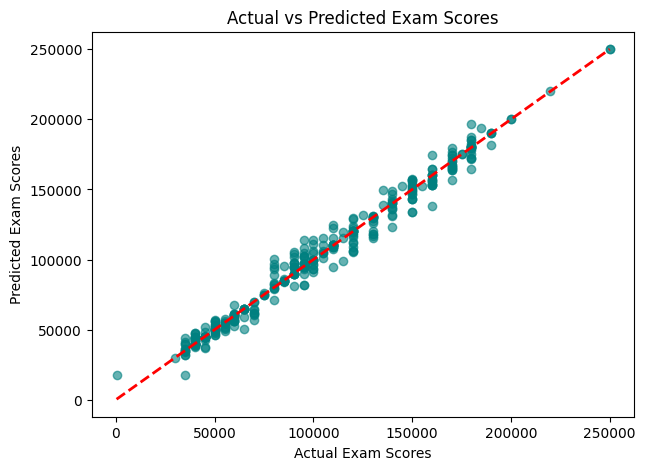

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(y, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.show()

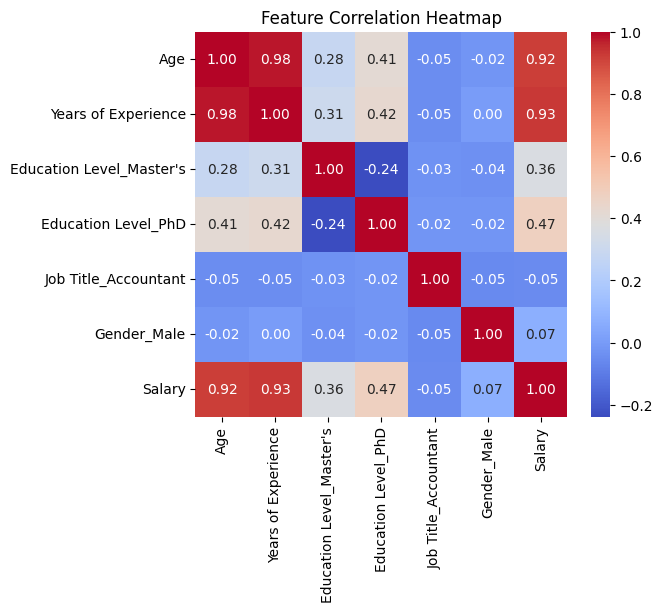

In [6]:
plt.figure(figsize=(6,5))
# corr_mat=df['Age','Years of Experience', 'Education Level', 'Salary'].corr()
sns.heatmap(df[["Age", "Years of Experience", "Education Level_Master's", "Education Level_PhD", "Job Title_Accountant", "Gender_Male", "Salary"]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()